# Importando bibliotecas

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit   # para ajuste das curvas dos modelos

In [14]:
# inclui funções para fitar curvas:
import sys
sys.path.insert(0,'/dados/github/projetos/recrutabilidade')
import modelos as m

In [2]:
%load_ext autoreload
%autoreload 2

# Lendo dados

In [3]:
dados_ct_df = pd.read_pickle('./dados_ct.pkl')
dados_ct_df

,Animal,Pressure,CT Volume,Volume (Luva),Estimated TLC,Estimated K,CT_Volume (rec),Pressure (rec),CT folders,CT folders (rec)
0,mra26,"[10, 30, 45]","[458.40117130279543, 1406.1211183943176, 1969....","[1367.135, 1944.058, 2571.724]",2622.866589,0.030899,"[0, 1373.4339242285157, 1969.8752383276367]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
1,mra28,"[10, 20, 25, 30, 45]","[539.5733922408295, 866.4519947195436, 1110.76...","[1283.233, 1660.177, 1847.163, 2051.841, 2076....",2105.897077,0.044662,"[0, 1384.9271159648897, 1823.6774616718296]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
2,mra29,"[10, 20, 25, 30, 45]","[531.2288735389709, 913.2518694877624, 1203.89...","[1500.447, 1878.034, 2151.105, 2277.27, 2840.79]",2205.711869,0.059637,"[0, 1678.5440254211426, 2055.0341540813447]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
3,mra31,"[10, 20, 25, 30, 45]","[522.4210849511719, 813.26760046875, 890.02122...","[1402.213, 1627.787, 1843.926, 1883.24, 2600.757]",1974.387706,0.061925,"[0, 1527.71957296875, 1852.7079208886719]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
4,mra32,"[10, 20, 25, 30, 45]","[235.01175971031188, 463.5827505111694, 505.55...","[1166.805, 1320.169, 1377.162, 1577.04, 1738.76]",1440.162084,0.047636,"[0, 981.0712067604064, 1271.3319202423095]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
5,mra33,"[10, 20, 25, 30, 45]","[401.59618649276734, 753.2439028810883, 1074.5...","[1389.504, 1681.394, 1921.372, 2127.672, 2858....",2154.565033,0.063430,"[0, 1684.4333432958988, 2030.4792702575683]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...
6,mra34,"[10, 20, 25, 30, 45]","[625.3166032908058, 952.6763394393921, 1109.27...","[1842.395, 2087.933, 2239.428, 2410.902, 3126....",2211.231284,0.054432,"[0, 1612.423954714756, 2020.3082057697106]","[0, 24, 45]",[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...,[/mnt/hdsda3/arquivos/Recrutamento/CT_data_org...


# Gerando gráficos

## Comparando volume de ar (CT x Luva)

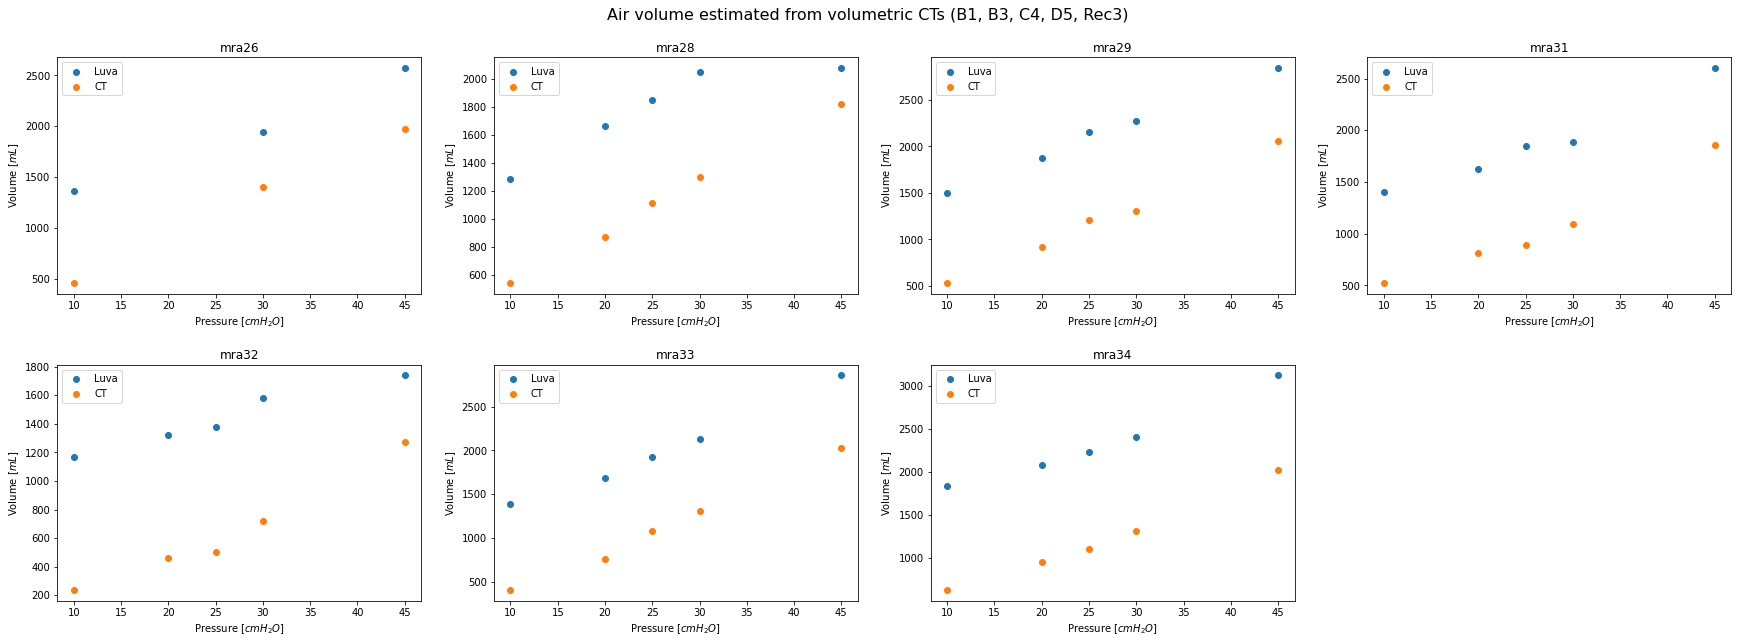

In [13]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    v_luva = dados_ct_df.iloc[idx]['Volume (Luva)']
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v_luva,label='Luva')
    plt.scatter(p, v,label='CT')
    #plt.scatter([0], [0],label='(0,0)')
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)

## CT vol x press

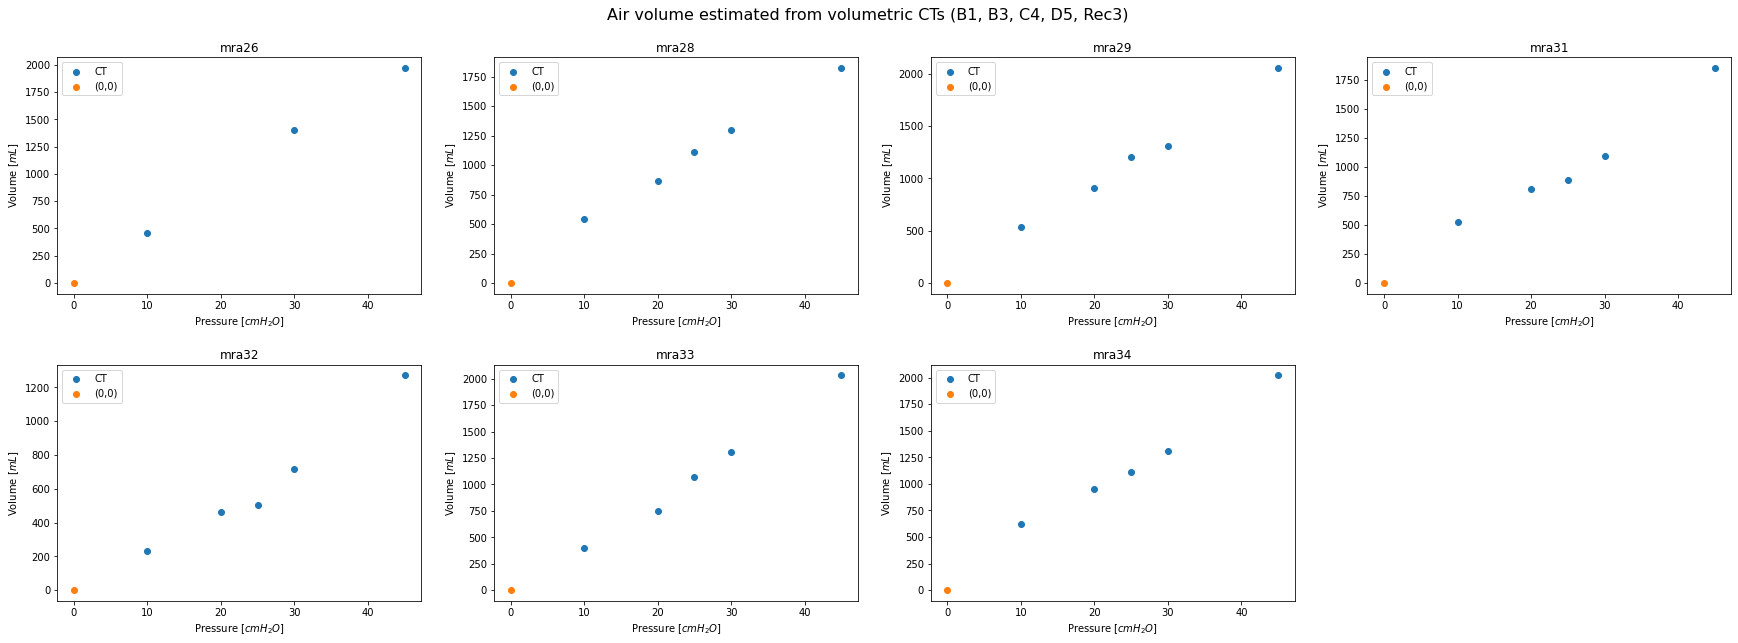

In [15]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT')
    plt.scatter([0], [0],label='(0,0)')
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)

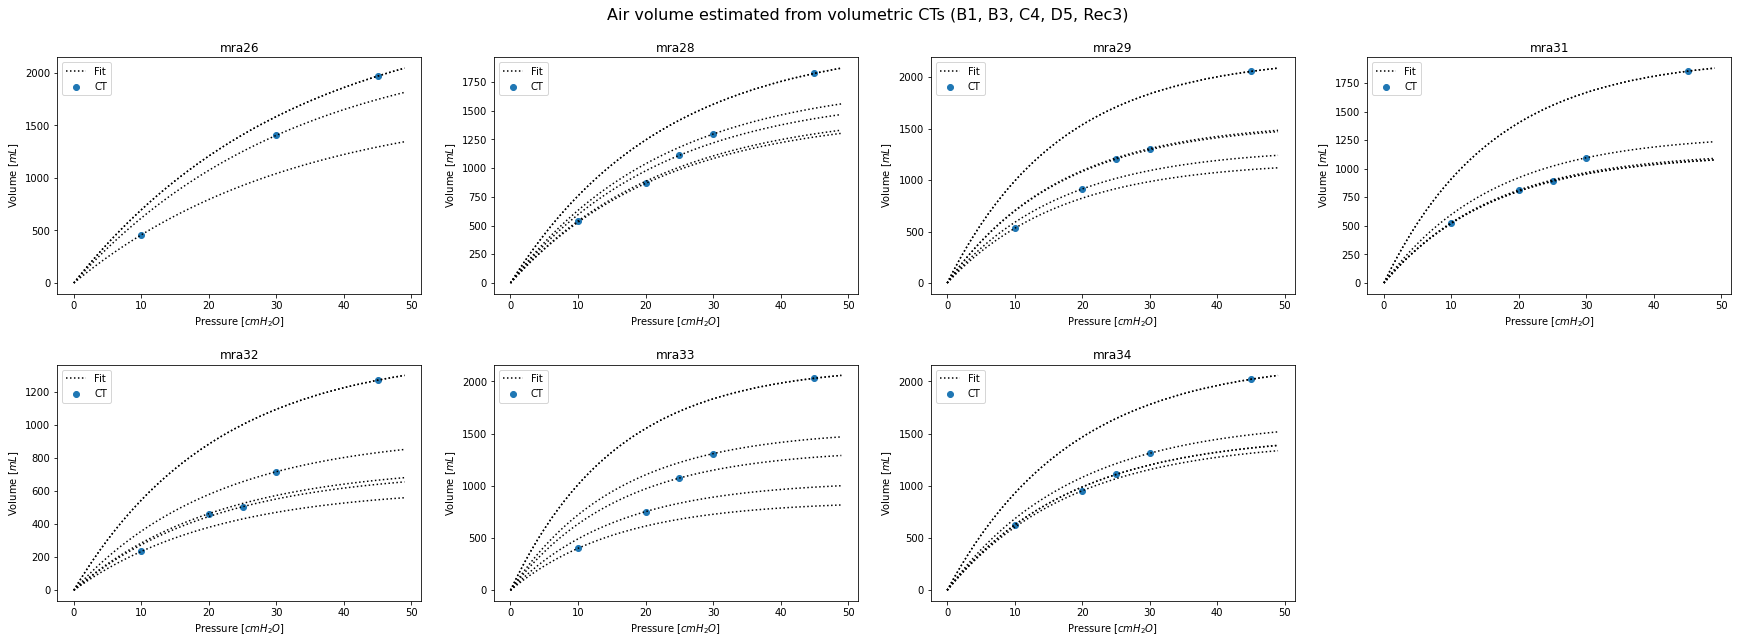

In [35]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure']
    v = dados_ct_df.iloc[idx]['CT Volume']
    
    p_fit = range(0,50)
    v_fit = m.expsalazar(p_fit, dados_ct_df.iloc[idx]['Estimated TLC'],dados_ct_df.iloc[idx]['Estimated K'])
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT')
    plt.plot(p_fit, v_fit, 'k:', label='Fit')
    
    K = dados_ct_df.iloc[idx]['Estimated K']
    for ponto in range(len(p)):
        pressoes = [0, p[ponto]]
        volumes = [0, v[ponto]]
        popt,pcov = curve_fit(lambda x, volumes: m.expsalazar(x, volumes, K), pressoes, volumes) # fit fixando K
        v_fit = m.expsalazar(p_fit, popt[0] ,K)
        plt.plot(p_fit, v_fit, 'k:')
    
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(dados_ct_df.iloc[idx]['Animal'])
    plt.suptitle('Air volume estimated from volumetric CTs (B1, B3, C4, D5, Rec3)', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)

## Estimando TLC

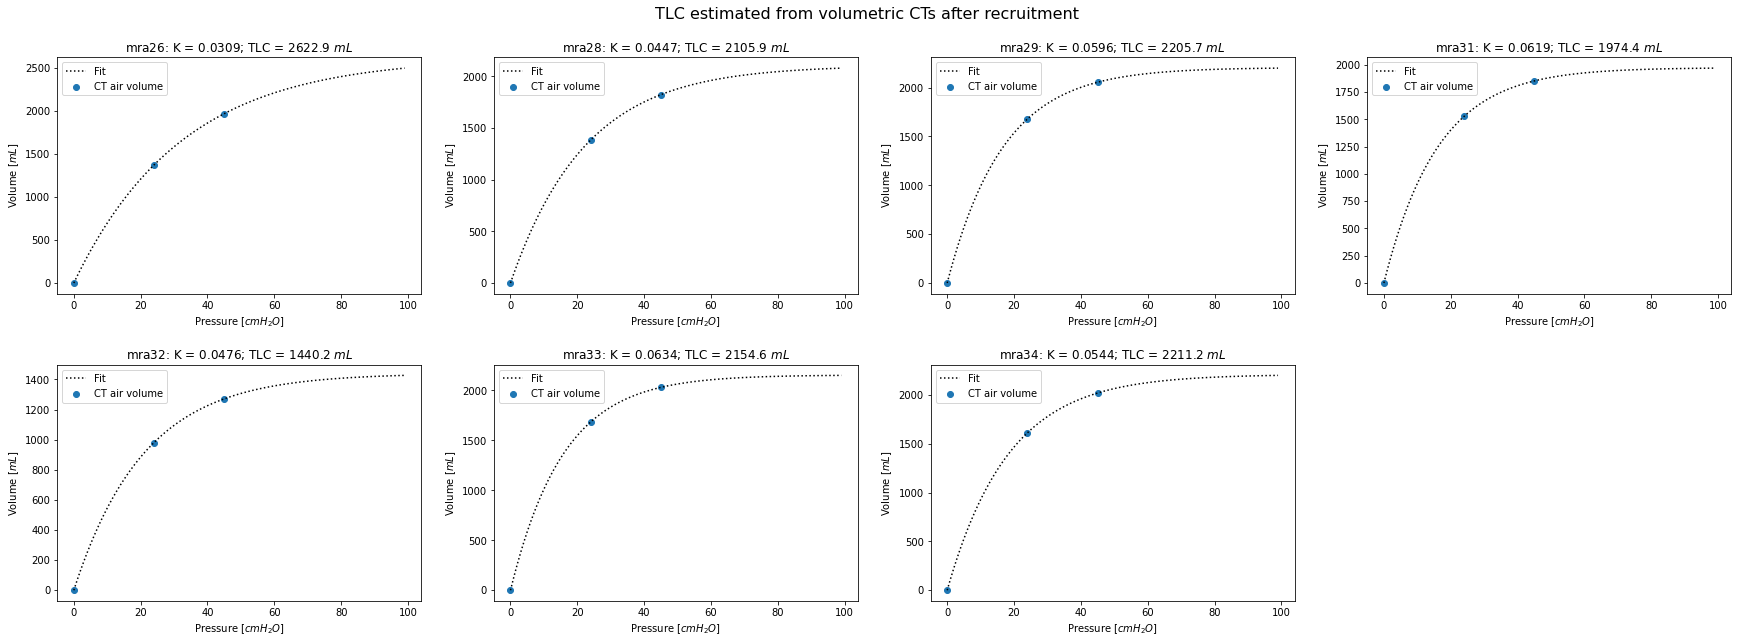

In [38]:
plt.subplots(figsize=(30, 10))
for idx in range(len(dados_ct_df)):
    p = dados_ct_df.iloc[idx]['Pressure (rec)']
    v = dados_ct_df.iloc[idx]['CT_Volume (rec)']
    
    p_fit = range(0,100)
    v_fit = m.expsalazar(p_fit, dados_ct_df.iloc[idx]['Estimated TLC'],dados_ct_df.iloc[idx]['Estimated K'])
    
    
    plt.subplot(2,4,idx+1)
    plt.scatter(p, v,label='CT air volume')
    plt.plot(p_fit, v_fit, 'k:', label='Fit')
    plt.legend()
    plt.xlabel('Pressure [$cmH_2O$]')
    plt.ylabel('Volume [$mL$]')
    plt.title(f'{dados_ct_df.iloc[idx]["Animal"]}: K = {dados_ct_df.iloc[idx]["Estimated K"]:.4f}; TLC = {dados_ct_df.iloc[idx]["Estimated TLC"]:.1f} $mL$')
    plt.suptitle('TLC estimated from volumetric CTs after recruitment', fontsize=16, y=0.95)
    plt.subplots_adjust(hspace=0.3, wspace=0.2) # plt.subplots_adjust(hspace=0.4, wspace=0.4)